# Estimation of the marginal likelihood in mixtures and HMMs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import h5py


## Loading the Data

In [7]:
home_dir = r'D:\Users\Dan\Documents\PhD\Code\Semiparametric-HMMs'
data_file = f'{home_dir}/local_data/sis_output.h5'

with h5py.File(data_file) as h5:
    print(h5.keys())

<KeysViewHDF5 ['Example_1A', 'Example_1B']>


In [8]:
keys = ['Example_1A', 'Example_1B']

## Functions for plots

In [9]:
def log_exponential_mean( x:pd.Series ):
    if type(x) == pd.DataFrame :
        return pd.Series( [ log_exponential_mean(x[col]) for col in x.columns] , index = x.columns)
    elif type(x) != pd.Series :
        raise TypeError('Please input pandas DataFrame or Series')
    y = max(x)
    x = x - max(x)
    return y + np.log(x.apply(np.exp).mean())

In [10]:
def cum_log_exp_mean(x):
    if type(x) == pd.DataFrame :
        return pd.DataFrame( [ cum_log_exp_mean(x[col]) for col in x.columns] ).transpose()
    elif type(x) != pd.Series :
        raise TypeError('Please input pandas DataFrame or Series')
    y = max(x)
    x = x - max(x)
    return np.log(x.apply(np.exp).cumsum() / x.apply(lambda t : 1 ).cumsum() ) + y

## Box Plots

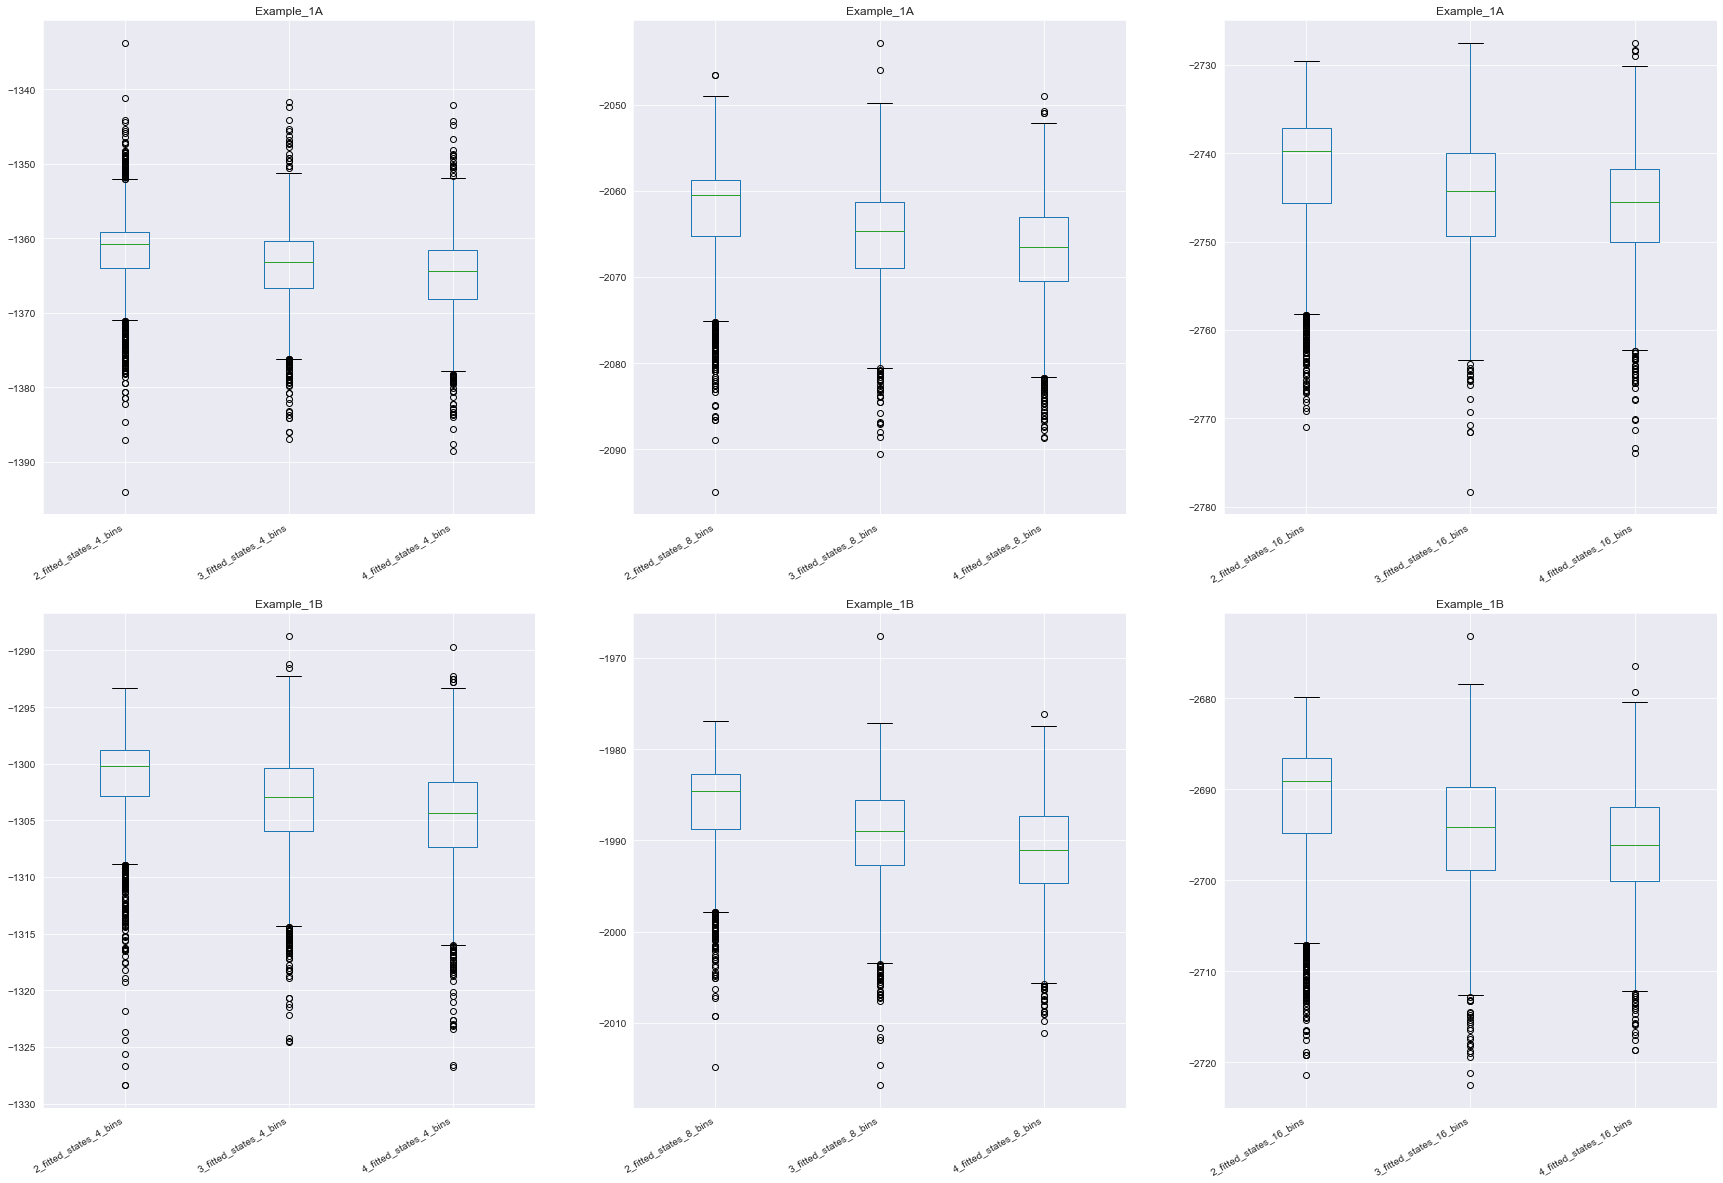

In [16]:
fig, ax = plt.subplots(len(keys),3, figsize=(30,10*len(keys)) )
bin_values = [4,8,16]
log_evid_mean_dict = {}
for key_idx, key in enumerate(keys):
    data = pd.read_hdf(data_file, key=key)
    data.rename(columns=lambda x: x.lstrip('log_evid_'), inplace=True)
    log_evid_mean_dict[key] = log_exponential_mean(data)
    for bin_idx, bin in enumerate(bin_values):
        ax[key_idx,bin_idx].set_title(key)
        data.filter(regex=f'{bin}_bins$').boxplot(ax=ax[key_idx,bin_idx])
        ax[key_idx,bin_idx].set_xticks(ax[key_idx,bin_idx].get_xticks())
        ax[key_idx,bin_idx].set_xticklabels(ax[key_idx,bin_idx].get_xticklabels(), rotation=30, ha='right')
log_evid_means = pd.DataFrame(log_evid_mean_dict)

## Cumulative mean plots

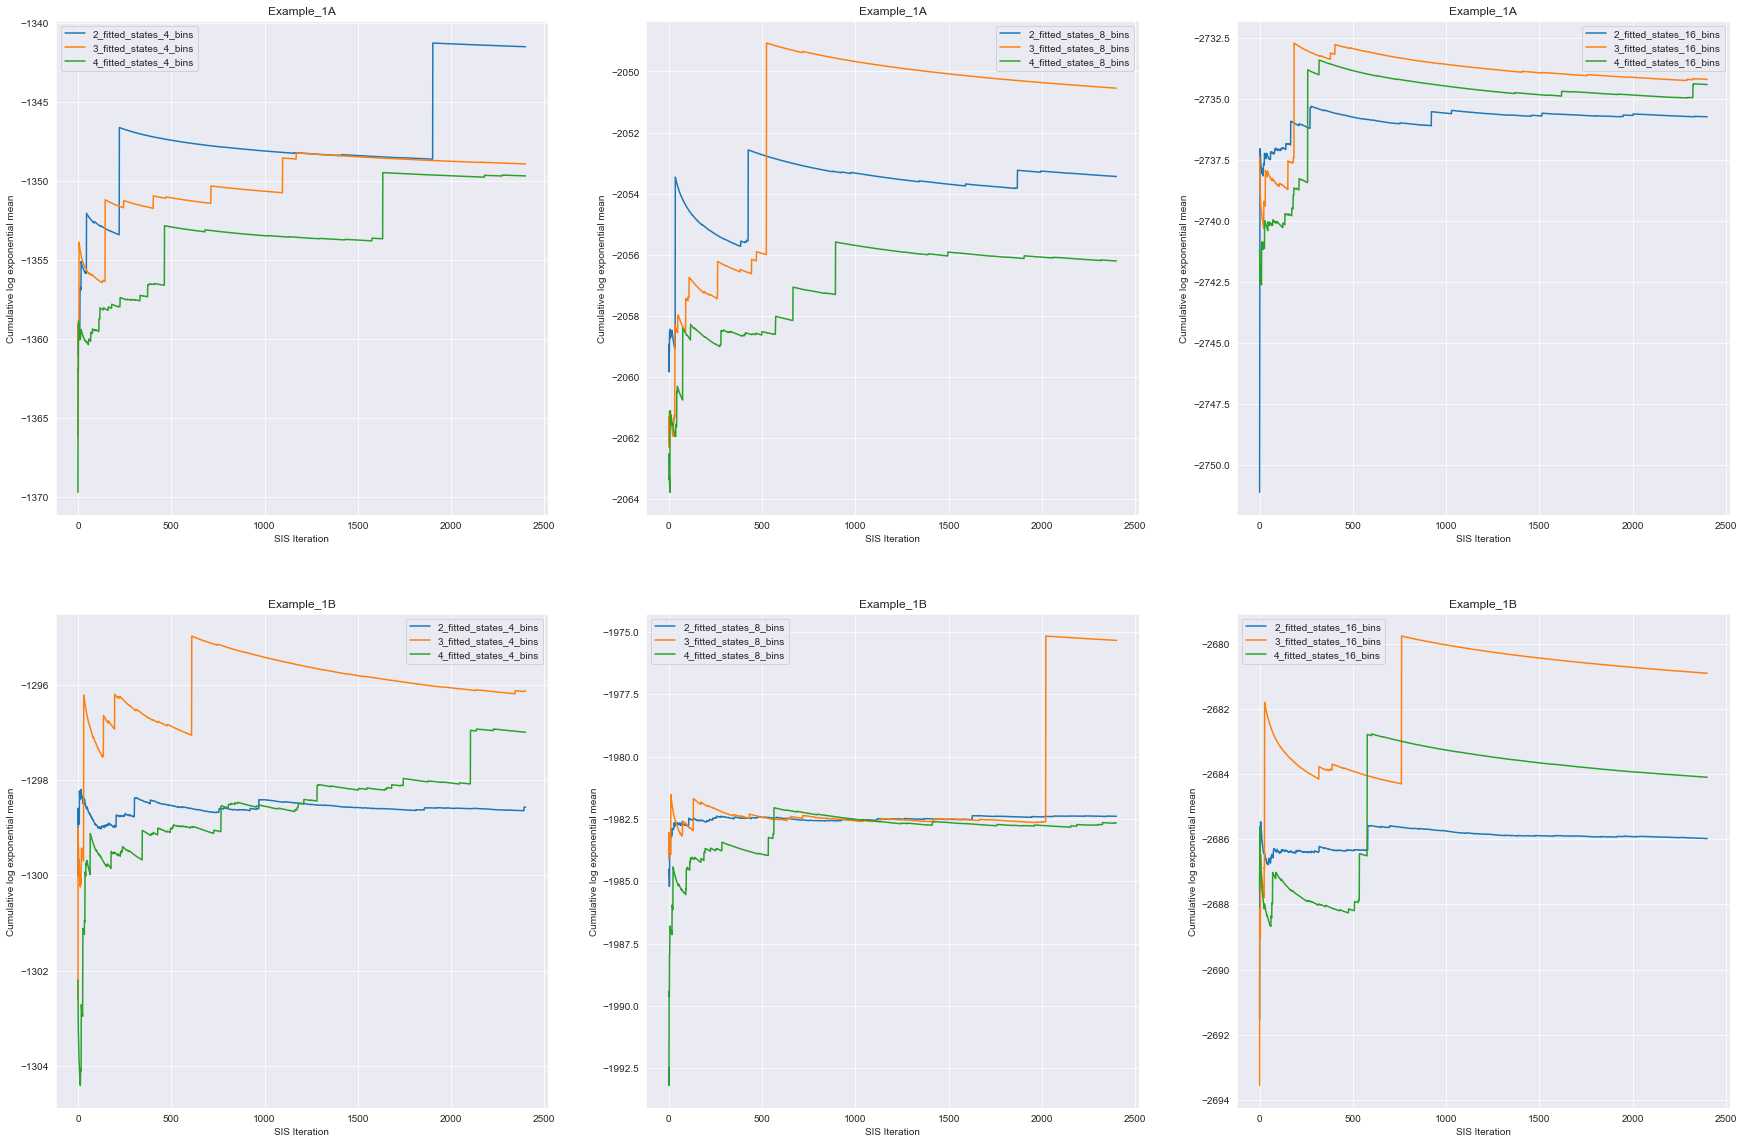

In [17]:
# stability plots
# data = pd.read_hdf(data_file, key='Example_1B')
bin_values = [4,8,16]
keys = ['Example_1A','Example_1B']
fig, ax = plt.subplots(nrows=len(keys),ncols=3,figsize=(30,10*len(keys)))
for key_idx, key in enumerate(keys):
    data = pd.read_hdf(data_file, key=key)
    data.rename(columns=lambda x: x.lstrip('log_evid_'), inplace=True)
    for bin_idx, bin in enumerate(bin_values):
        ax[key_idx,bin_idx].set_title(key)
        ax[key_idx,bin_idx].set_xlabel('SIS Iteration')
        ax[key_idx,bin_idx].set_ylabel('Cumulative log exponential mean')
        cum_log_exp_mean(data.filter(regex=f'{bin}_bins$')).plot(ax=ax[key_idx,bin_idx])
